[View in Colaboratory](https://colab.research.google.com/github/fabiansd/AI-workshop/blob/master/AI_workshop_melbourne.ipynb)

Github:

https://github.com/fabiansd/AI-workshop/blob/master/AI_workshop_melbourne.ipynb

# Datasett

Beskrivelse av datasett:

https://www.kaggle.com/c/home-data-for-ml-course/data


Alle måleenhetene utgjør hver sin kolonne, og kalles *features*


# Importering av data og python-bibliotek

Python tillater å bruke mange forskjellige ferdigskrevne funksjoner. Disse lagres i biblioteker som må importeres før de kan brukes. 

### Bibliotek dokumentasjon

Pandas (datahåndtering):
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

Seaborn (plottefunksjoner):
https://seaborn.pydata.org/index.html

Matplotlib (plottestøttefunksjoner)
https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure

Scikit-learn (maskinlæring):
http://scikit-learn.org/stable/


Bruk google hyppig, se på eksempler!

In [25]:
## Import av biblioteker 
import sklearn
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Laster ned datasettet fra lenken og lagrer dette som filen Melbourne_train.csv
from six.moves import urllib
urllib.request.urlretrieve("https://raw.githubusercontent.com/fabiansd/AI-workshop/master/data/Melbourne_train.csv", "./Melbourne_train.csv")

('./Melbourne_train.csv', <http.client.HTTPMessage at 0x7feaf096f7f0>)

# Databehandling

Første steg i et AI-prosjekt er å undersøke og studere dataen. Pandas har mange funksjoner som kan hjelpe til med dette. Det er viktig få et innblikk i hvordan dataen ser ut og hva slag verdier den faktisk inneholder. Pandas kan sammenliknes med excel, bare for python.


## Utforsking av data

Dataen blir lest og lastet opp av pandas biblioteket. Dette gjøres ved å bruke pandas-funksjonen <br>
$pd.read\_csv()$. <br>Funksjonen tar en parameter som er filstien til csv-filen som vi har lastet ned. Parameteren må være av typen String. Det betyr tekst og må skrives inne mellom anførselstegn. <br> I dette tilfellet er parameteren<i> "Melbourne_train.csv"</i><br>

Funksjonen returnerer et objekt som representerer datasettet vårt. I dette tilfellet heter objektet $data$

In [0]:
data = pd.read_csv('Melbourne_train.csv')

Et Pandas-element har mange funksjoner. Disse utfører ulike operasjoner på objektet. <br>
Eksempelvis kan man skrive ut de N førset elementene i datasettet ved å skrive: <br> $data.head(N)$ <br>
Denne funksjonen tar parametre av typen heltall også kalt Integer.<br> I dette tilfellet er parameteren <i>10</i>

In [5]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


På samme vis kan de 5 siste elementene vises ved å skrive: 
<br>$data.tail(5)$

In [6]:
data.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


Med pandas kan man få en statistisk oversikt over datasettet med funksjonen <br> $data.describe()$ <br> For eksempel kan vi se hva gjennomsnittlig salgspris for boliger er. <br> Merk at oversikten viser kun numeriske features, og ikke kategoriske features som også finnes i datasettet.

In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Videre kan det være nyttig å skrive ut navnet på alle kolonnene i datasettet vårt. Disse er lagret i en variabel til objektet $data$. <br> Disse kan aksesseres ved å skrive $data.columns$ og kan printes rett ut gjennom Python sin $print()$ funksjon 

In [8]:
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Pandas kan også gi info om hva slags data som er lagret i datasettet, og hvor mange instanser det er i hver kolonne. Dette gjøres gjennom funksjonen <br>
$data.info()$ <br>
Det kan også være greit å vite hvor mange linjer det faktisk er. Vi teller derfor antallet linjre i objektet $data$ ved å bruke funksjonen <br>
$len()$ <br>
Denne funksjonen kan ta objektet $data$, som vi ønsker å telle, som parameter.

In [9]:
data.info()

## Skriver ut lengden på datasettet. Dvs antallet linjer i datasettet
print('\n Lengde på data: {}'.format(len(data)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Som vi kan se i denne informasjonen så er det ikke like mange verdier i de ulike attributtene, det vi kaller features. Det er ikke uvanlig at det mangler verdier i datasettet. Vi kan sjekke hvilke features som mangler en eller flere verdier med funksjonene <br> $.isnull().any()$ <br>

In [10]:
print(data.isnull().any())

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

Ofte er registreringer ufullstendige og mangler data i spesifikke kolonner. En vanlig måte å håndtere manglende verdier på er å fjerne hele raden.

I vårt tilfelle finnes det en kolonne, <i>kvalitet på badebasseng</i>, hvor det kun er gjort <b>7</b> registreringer. Ved å fjerne alle linjer som ikke innholder verdi for denne kolonnen ville man følgelig stått igjen med <b>7</b> registreringer. Vi kan heller ikke gjøre noen god gjetning på hva de manglende verdiene skal være. Derfor er det ikke mulig å tette disse "hullene", og "PoolQC" er derfor en lite egnet feature å benytte.


For å droppe rader men en eller flere manglende verdier kan man gjøre følgende:

<br> $ data = data.dropna() $<br>

Dette resulterer i ingen registreringer, siden alle rader inneholder minst en manglende verdi.

In [32]:
data_ingen_mangel = data.dropna()
data_ingen_mangel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 81 columns):
Id               0 non-null int64
MSSubClass       0 non-null int64
MSZoning         0 non-null object
LotFrontage      0 non-null float64
LotArea          0 non-null int64
Street           0 non-null object
Alley            0 non-null object
LotShape         0 non-null object
LandContour      0 non-null object
Utilities        0 non-null object
LotConfig        0 non-null object
LandSlope        0 non-null object
Neighborhood     0 non-null object
Condition1       0 non-null object
Condition2       0 non-null object
BldgType         0 non-null object
HouseStyle       0 non-null object
OverallQual      0 non-null int64
OverallCond      0 non-null int64
YearBuilt        0 non-null int64
YearRemodAdd     0 non-null int64
RoofStyle        0 non-null object
RoofMatl         0 non-null object
Exterior1st      0 non-null object
Exterior2nd      0 non-null object
MasVnrType       0 non-null object
Mas

Pandas tillater å hente ut enkeltkolonner, og man kan dermed hente ut featurene man ønsker og eskludere de man ikke ønsker. Disse kan utvinnes ved å referere til "kolonnenavnet."
Syntaksen for å hente ut en kolonne er som følger: <br>
$data['Kolonnenavn']$<br>
I vårt tilfelle velger vi å lagre denne kolonnen i et nytt pandas-objekt kalt $data\_ÅrSolgt$

In [11]:
## Kolonnen "YrSold" lagres i et nytt Pandas-objekt kalt data_ÅrSolgt
data_ÅrSolgt = data['YrSold']

## Skriver ut de 10 første linjene i data_ÅrSolgt
data_ÅrSolgt.head(10)

0    2008
1    2007
2    2008
3    2006
4    2008
5    2009
6    2007
7    2009
8    2008
9    2008
Name: YrSold, dtype: int64

man kan også filtrere ut spesifikk data, som for eksempel alle boliger solgt i 2008

In [12]:
## Henter ut alle linjer der YrSold er lik 2008
data_Solgt2008 = data[data['YrSold'] == 2008]

## Skriver ut 10 første linjer av data_Solgt2008
data_Solgt2008.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
18,19,20,RL,66.0,13695,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,159000
22,23,20,RL,75.0,9742,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,230000


Pandas fungerer på mange måter som Excel. Man kan derfor hente ut verdier ved å refere til en bestemt "celle" i objektet. 
På den måten kan enkeltverdier hentes ut med tall-indeksering ved bruk av iloc-funksjonenen. <br>
Eksempelvis henter følgende kode ut data lagret i <i>rad 0</i> og <i>kolonne 3</i>

In [13]:
## Verdien fra linje 0, kolonne 3 lagres i variabelen verdi
verdi = data.iloc[0,3]

## Navnet på kolonne 3 lagres i variabelen feature
feature = data.columns[3]

## Skriver ut variablene feature og verdi
print(feature, verdi)

LotFrontage 65.0


Man kan lage nye subdatasett av det originale datasettet ved å hente ut ønskede kolonner med data. Dette lar deg konstruere helt nye datasett.<br>

Her introduseres vi for Pythons liste-objekt. I denne listen lagres **3** verdier av typen String; "MoSold", "YrSold", og "SalesPrice". 
<br>Listen opprettes ved å skrive: <br>
$kolonner\_salgsinfo = ['MoSold', 'YrSold', 'SalesPrice']$

Deretter kan de ønskede kolonnene hentes ut med denne listen

In [14]:
## Oppretter liste som inneholder navnene på kolonnene vi ønsker å hente ut
kolonner_salgsinfo = ['MoSold','YrSold','SalePrice']

##  Henter ut kolonnene vi ønsker fra data. Lagres i data_salgsinfo
data_salgsinfo = data[kolonner_salgsinfo]

## Skriver ut de 10 første linjene i data_salgsinfo
data_salgsinfo.head(10)

,MoSold,YrSold,SalePrice
0,2,2008,208500
1,5,2007,181500
2,9,2008,223500
3,2,2006,140000
4,12,2008,250000
5,10,2009,143000
6,8,2007,307000
7,11,2009,200000
8,4,2008,129900
9,1,2008,118000


Nye features kan konstrueres ved å lage kombinasjoner av kolonner i datasettet. Siden kolonnen 'HouseAge' ikke finnes i datasettet vil det blir oprettet som en ny kolonne som inneholder data om hvor gammelt huset er. <br>Dette regnes ut ved å trekke årstallet for når huset ble solgt fra husets byggeår. 


In [15]:
## Regner ut husets alder og lagrer dette i en ny kolonne kalt HouseAge
data_salgsinfo['HouseAge'] = data['YrSold'] - data['YearBuilt']

## Skriver ut de 5 første linjene av data_salgsinfo for å se at den nye kolonnen er på plass med logiske verdier.
data_salgsinfo.head(5)

,MoSold,YrSold,SalePrice,HouseAge
0,2,2008,208500,5
1,5,2007,181500,31
2,9,2008,223500,7
3,2,2006,140000,91
4,12,2008,250000,8


Vi kan nå enkelt finne gjennomsnittlig husalder ved å bruke <br> $ describe()$<br> 

In [16]:
data_salgsinfo.describe()

,MoSold,YrSold,SalePrice,HouseAge
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.321918,2007.815753,180921.195890,36.547945
std,2.703626,1.328095,79442.502883,30.250152
min,1.000000,2006.000000,34900.000000,0.000000
25%,5.000000,2007.000000,129975.000000,8.000000
50%,6.000000,2008.000000,163000.000000,35.000000
75%,8.000000,2009.000000,214000.000000,54.000000
max,12.000000,2010.000000,755000.000000,136.000000


Man kan også få en oversikt over hva kategoriske features inneholder, som for eksempel "Neighborhood", for å hjelpe deg med å bli kjent med hva dataen inneholder.

For å telle antall enititeter av ulike kategorier i "Neighborhood" kan man skrive:<br>
$data["Neighborhood"].value\_counts()$<br>


In [17]:
data["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Denne kategoriske featuren viser at boligene er fordelt over mange nabolag. Dette er en god feature fordi den tilfører nyttig informasjon til datasettet. Om vi ser på featuren 'Utilities' derimot, så ser vi at det er et eneste tilfelle av kategorien **NoSeWa**, resten tilhører den andre kategorien. Dette vil være en feature som ikke tilfører noe informasjon, men opptar plass og øker kompleksiteten på datasettet unædvendig.

In [18]:
data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

#Visualisering av data

Visualisering er en viktig del av den initielle utforskingen av dataen. Det viser ofte informasjon som er vanskelig å få ved å kun se på dataen i rå form.

Bibliotekene vi bruker her er Matplotlib og Seaborn (plt og sns)

## Fordeling av data

Måten man lager en figure på er som følger:

<br>$plt.figure(figsize=(n,m)) $ <br>
Dette lager et figur objekt. Deretter velger man hvilke data man vil plott og hvordan, f.eks histogram, linjeplot osv. Her er det mange plotfunksjoner fra seaborn som er nyttige.

<br> $sns.distplot() $ <br>

Seaborn dokumentasjonen på distplot forklarer hvilke argumenter man kan putte inn i parantesen. For eksempel hvilken data man vil bruke. https://seaborn.pydata.org/generated/seaborn.distplot.html

Deretter kan man velge hva som skal skrives langs x- og y-aksen, og om man vil ha tittel. Se mer på https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure

Et histogram viser fordelinen av data i "bøtter", altså intervaller med data. Dette er velegnet for å studere fordeling av talldata. For eksempel kan vi visualisere fordelingen av salgsprisen fordelt over et valgfritt antall bøtter.

Text(0.5,1,'Fordeling av slagspris')

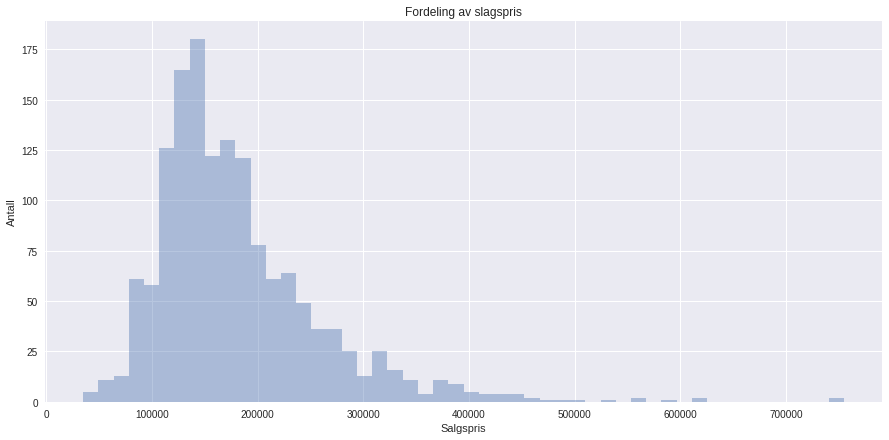

In [18]:
#Lab figur-objekt og bestem størrelsen
plt.figure(figsize=(15,7))

#Velg type plot med sns (seaborn) biblioteket.
sns.distplot(data['SalePrice'],bins=50, kde=False);

#X- og y-aksen kan navngis
plt.ylabel('Antall')
plt.xlabel('Salgspris')

#Sett tittel på figur
plt.title('Fordeling av slagspris')

Fordelingen kan også visualiseres med en tilpasset funksjon (kde) ved å sette kde til true og hist til false.

Text(0.5,1,'Fordeling av slagspris')

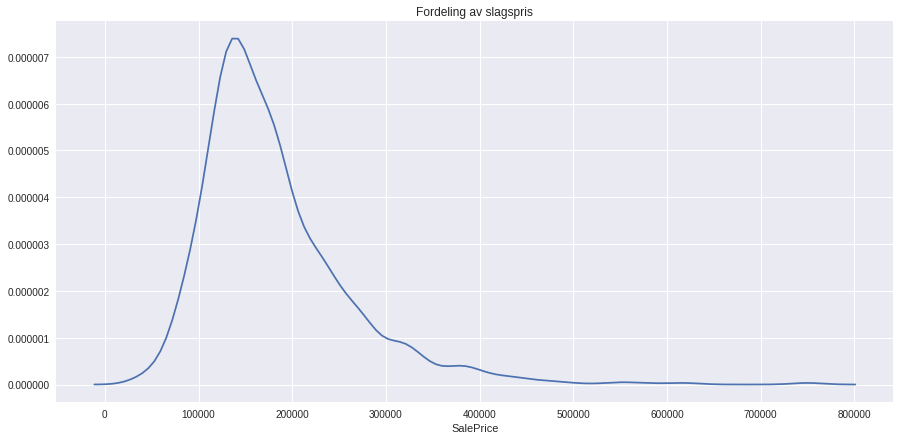

In [19]:
plt.figure(figsize=(15,7))

## Endrer kde til True
sns.distplot(data['SalePrice'],hist=False, kde=True);

plt.title('Fordeling av slagspris')

Kategorisk data kan vi visualisere ved å bruke countplots. For eksempel kan vi få en oversikt over hvor mange salg som ble gjort i de ulike årene.

Text(0.5,1,'Salg per år')

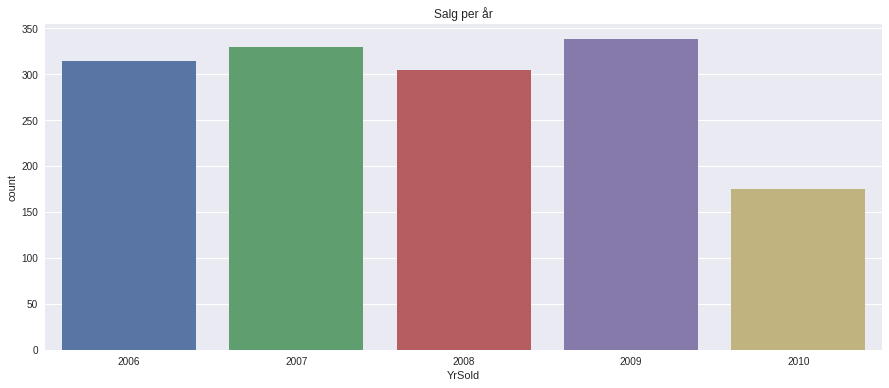

In [20]:
plt.figure(figsize=(15, 6))
sns.countplot(x='YrSold', data=data)
plt.title('Salg per år')

Man kan også gruppere inn countplots etter kategori, for eksempel kan vi fordele salg per år inn i måneder også.

Text(0.5,1,'Salg per år fordelt over måneder')

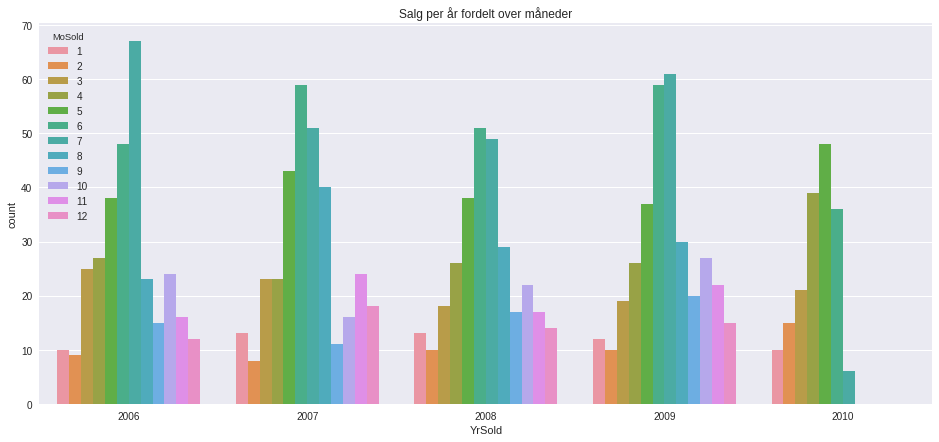

In [21]:
plt.figure(figsize=(16, 7))
sns.countplot(x='YrSold', hue='MoSold', data=data)
plt.title('Salg per år fordelt over måneder')

Plottet kan legges sidelengs ved å plotte dataen i y-retning istedenfor. Dette kan gjøre det enklere å tyde plottet.

Text(0.5,1,'Oversik over nabolag')

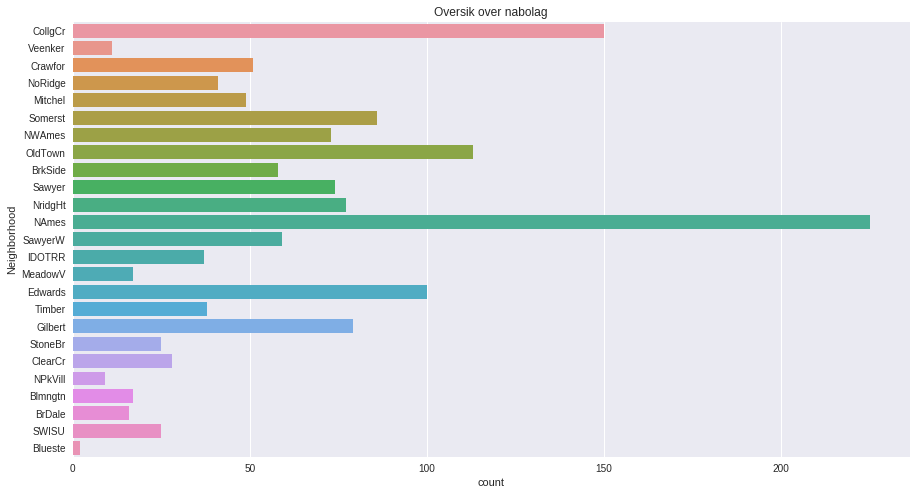

In [22]:
plt.figure(figsize=(15, 8))
sns.countplot(y='Neighborhood', data=data)
plt.title('Oversik over nabolag')

##Korrelasjon

For å få innsikt i hvilken effekt featurene har på hverandre er det nyttig å se på korrelasjonen mellom dem. Et korrelasjonsplot mellom variabler viser hvor my to variabler endrer seg i takt med hverandre. Om en variabel korrelerer positivt med en annen variable, vil begge typisk stige på samme tidspunkt. Om to variabler korrelerer negativt, vil den ene variabelen synke når den andre stiger.


På korrelasjonsplottet under ser vi at det er perfekt korrelasjon langs diagonalen, noe som er naturlig siden alle variabler korrelerer perfekt med seg selv. Vi kan for eksempel se at OverallQual, som er generell kvalitet, korrelerer positivt med YearBuilt. Dette er logisk siden kvaliteten på nyere hus er typisk bedre enn på eldre hus.


Det mest interessante å studere her er korrelasjonen mellom salgspris og de andre featurene. Merk at OverallQual korrelerer sterkt positivt med SalePrice, ikke overraskende.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5]), <a list of 38 Text yticklabel objects>)

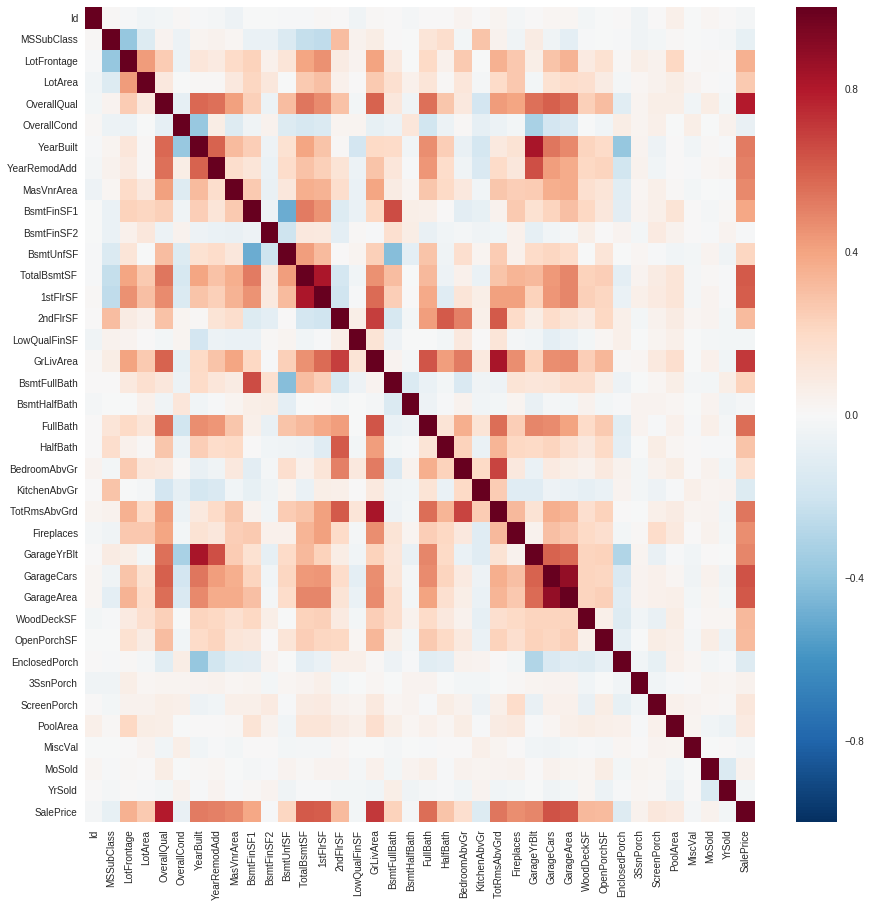

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot = False, cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

## Oppgave: studer og visualiser data


Finn følgende informasjon: 

 - Første og siste salg (måned og år)
 
 - Største svømmebasseng
  
 - Gjennomsnittlig antall bad i ulike nabolag


Visualiser følgende:

 - Fordeling av kvadratfot på alle tomter

 - Fordeling over når boligene ble bygget

 - Hvor mange salg det er i hver måned totalt

Lag gjerne andre visualiseringer dere syntes virker interessante.

In [0]:
"Skriv kode her"

## Oppgave: lag nytt datasett

Lag et nytt datasett og velg ut features dere tenker er nyttige. Studer dataen ved bruk av alt vi har gått gjennom, tenk at det er fordel å ha så lite unødvendig data i datasettet som mulig. Benytt korrelasjonsplottet til å velge ut features dere syntes virker nyttige. Følg oså med på telleoversikten over manglende verdier. Lag et nytt korrelasjonsplot til det nye datasettet

In [0]:
#Skriv kode her

## Løsningsforslag: studer og visualiser data

In [26]:
data_nabolag = data[data['Neighborhood'] == 'OldTown']
data_nabolag.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,113.000000,113.000000,109.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,101.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.0,113.000000,113.000000,113.000000,113.000000
mean,694.194690,66.238938,62.788991,8207.061947,5.389381,6.353982,1922.884956,1975.424779,14.194690,163.610619,28.584071,618.035398,810.230088,970.955752,488.150442,20.619469,1479.725664,0.159292,0.035398,1.336283,0.176991,2.814159,1.185841,6.539823,0.336283,1951.594059,1.433628,382.123894,51.637168,48.876106,73.566372,1.238938,12.637168,0.0,34.513274,6.539823,2007.787611,128225.300885
std,435.761891,48.354767,18.170017,3235.479875,1.291688,1.444944,23.095590,23.440961,68.603267,262.272637,124.145416,329.614708,257.774438,250.217098,419.871733,90.870131,576.943613,0.391115,0.185607,0.527978,0.383361,0.931096,0.434015,1.880518,0.576483,27.011175,0.789169,228.202140,103.117570,96.499087,94.110580,13.170092,66.273252,0.0,175.265060,2.587868,1.345968,52650.583185
min,9.000000,20.000000,30.000000,2500.000000,3.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,572.000000,0.000000,0.000000,691.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,2006.000000,37900.000000
25%,305.000000,30.000000,50.000000,5720.000000,5.000000,5.000000,1910.000000,1950.000000,0.000000,0.000000,0.000000,416.000000,662.000000,808.000000,0.000000,0.000000,1056.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1928.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,2007.000000,105900.000000
50%,638.000000,50.000000,60.000000,7800.000000,5.000000,6.000000,1920.000000,1980.000000,0.000000,0.000000,0.000000,650.000000,789.000000,916.000000,548.000000,0.000000,1374.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1950.000000,1.000000,352.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,2008.000000,119000.000000
75%,1077.000000,70.000000,63.000000,10410.000000,6.000000,7.000000,1939.000000,2000.000000,0.000000,308.000000,0.000000,813.000000,952.000000,1089.000000,764.000000,0.000000,1768.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,8.000000,1.000000,1970.000000,2.000000,520.000000,48.000000,54.000000,130.000000,0.000000,0.000000,0.0,0.000000,8.000000,2009.000000,140000.000000
max,1439.000000,190.000000,153.000000,22950.000000,10.000000,9.000000,2003.000000,2008.000000,435.000000,1088.000000,692.000000,1470.000000,1559.000000,1766.000000,1818.000000,572.000000,3608.000000,2.000000,1.000000,3.000000,1.000000,5.000000,3.000000,12.000000,2.000000,2005.000000,4.000000,936.000000,436.000000,547.000000,386.000000,140.000000,480.000000,0.0,1200.000000,12.000000,2010.000000,475000.000000


Text(0.5,1,'Fordeling av kvadratfot på tomt')

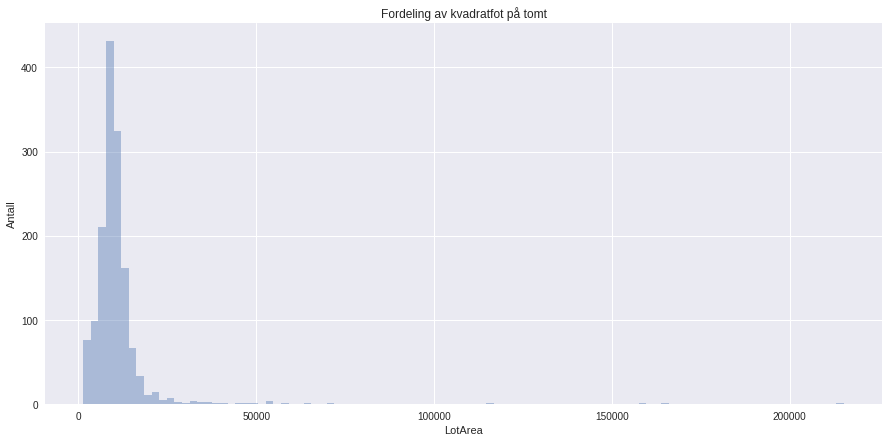

In [26]:
plt.figure(figsize=(15,7))
sns.distplot(data['LotArea'],bins=100, kde=False);
plt.ylabel('Antall')
plt.title('Fordeling av kvadratfot på tomt')

Text(0.5,1,'Fordeling av år boligene ble bygget')

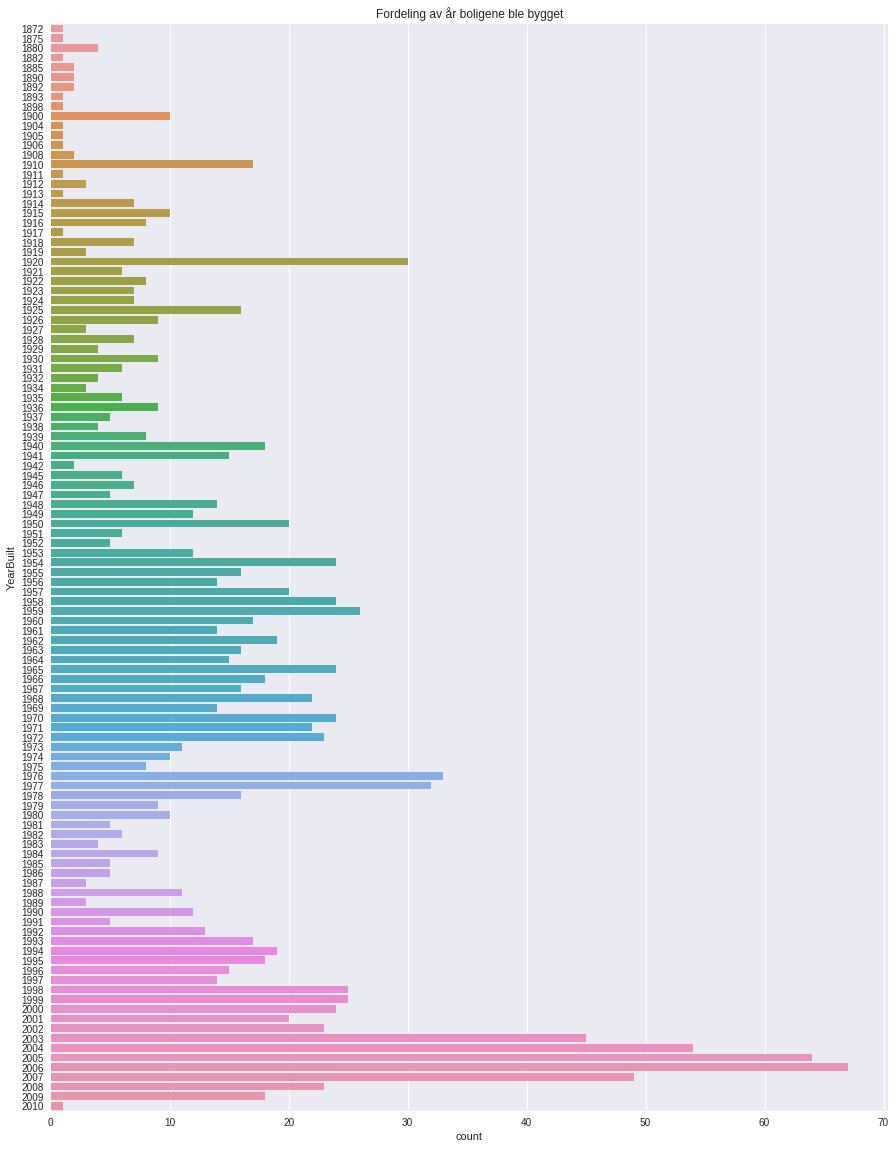

In [27]:
plt.figure(figsize=(15, 20))
sns.countplot(y='YearBuilt', data=data)
plt.title('Fordeling av år boligene ble bygget')

Text(0.5,1,'Salg per måned')

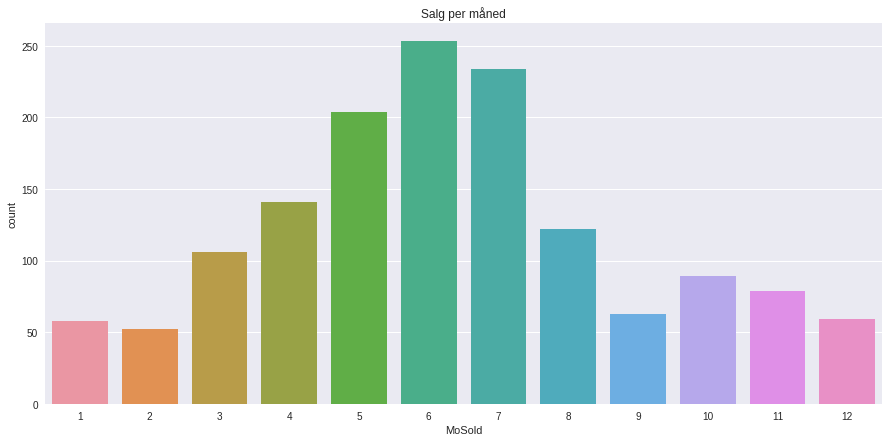

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(data['MoSold'])
plt.title('Salg per måned')

##Løsningsforslag: konstruer datasett

In [28]:
#aktuelle_kolonner = ['LotArea','Neighborhood','WoodDeckSF','Condition1','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','ExterQual','Foundation','Heating','HeatingQC','1stFlrSF','1stFlrSF','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars','Fireplaces','PoolArea','MoSold','YrSold']
aktuelle_kolonner = ['LotArea','Neighborhood','WoodDeckSF','Condition1','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','1stFlrSF','1stFlrSF','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars','Fireplaces','PoolArea','MoSold','YrSold']
data_modell = data[aktuelle_kolonner]
data_modell['HouseAge'] = data['YrSold'] - data['YearBuilt']
data_modell['SalePrice'] = data['SalePrice']
data_modell.head(5)

,LotArea,Neighborhood,WoodDeckSF,Condition1,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,Fireplaces,PoolArea,MoSold,YrSold,HouseAge,SalePrice
0,8450,CollgCr,0,Norm,2Story,7,5,2003,2003,856,856,2,1,3,1,8,2,0,0,2,2008,5,208500
1,9600,Veenker,298,Feedr,1Story,6,8,1976,1976,1262,1262,2,0,3,1,6,2,1,0,5,2007,31,181500
2,11250,CollgCr,0,Norm,2Story,7,5,2001,2002,920,920,2,1,3,1,6,2,1,0,9,2008,7,223500
3,9550,Crawfor,0,Norm,2Story,7,5,1915,1970,961,961,1,0,3,1,7,3,1,0,2,2006,91,140000
4,14260,NoRidge,192,Norm,2Story,8,5,2000,2000,1145,1145,2,1,4,1,9,3,1,0,12,2008,8,250000


In [29]:
data_modell.describe()

,LotArea,WoodDeckSF,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,Fireplaces,PoolArea,MoSold,YrSold,HouseAge,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,94.244521,6.099315,5.575342,1971.267808,1984.865753,1162.626712,1162.626712,1.565068,0.382877,2.866438,1.046575,6.517808,1.767123,0.613014,2.758904,6.321918,2007.815753,36.547945,180921.195890
std,9981.264932,125.338794,1.382997,1.112799,30.202904,20.645407,386.587738,386.587738,0.550916,0.502885,0.815778,0.220338,1.625393,0.747315,0.644666,40.177307,2.703626,1.328095,30.250152,79442.502883
min,1300.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,34900.000000
25%,7553.500000,0.000000,5.000000,5.000000,1954.000000,1967.000000,882.000000,882.000000,1.000000,0.000000,2.000000,1.000000,5.000000,1.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,129975.000000
50%,9478.500000,0.000000,6.000000,5.000000,1973.000000,1994.000000,1087.000000,1087.000000,2.000000,0.000000,3.000000,1.000000,6.000000,2.000000,1.000000,0.000000,6.000000,2008.000000,35.000000,163000.000000
75%,11601.500000,168.000000,7.000000,6.000000,2000.000000,2004.000000,1391.250000,1391.250000,2.000000,1.000000,3.000000,1.000000,7.000000,2.000000,1.000000,0.000000,8.000000,2009.000000,54.000000,214000.000000
max,215245.000000,857.000000,10.000000,9.000000,2010.000000,2010.000000,4692.000000,4692.000000,3.000000,2.000000,8.000000,3.000000,14.000000,4.000000,3.000000,738.000000,12.000000,2010.000000,136.000000,755000.000000


In [30]:
data_modell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
LotArea         1460 non-null int64
Neighborhood    1460 non-null object
WoodDeckSF      1460 non-null int64
Condition1      1460 non-null object
HouseStyle      1460 non-null object
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
1stFlrSF        1460 non-null int64
1stFlrSF        1460 non-null int64
FullBath        1460 non-null int64
HalfBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
KitchenAbvGr    1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
GarageCars      1460 non-null int64
Fireplaces      1460 non-null int64
PoolArea        1460 non-null int64
MoSold          1460 non-null int64
YrSold          1460 non-null int64
HouseAge        1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(20), object(3)
memory usage: 262.4+ KB


In [31]:
data_modell = data_modell.dropna()
data_modell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 23 columns):
LotArea         1460 non-null int64
Neighborhood    1460 non-null object
WoodDeckSF      1460 non-null int64
Condition1      1460 non-null object
HouseStyle      1460 non-null object
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
1stFlrSF        1460 non-null int64
1stFlrSF        1460 non-null int64
FullBath        1460 non-null int64
HalfBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
KitchenAbvGr    1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
GarageCars      1460 non-null int64
Fireplaces      1460 non-null int64
PoolArea        1460 non-null int64
MoSold          1460 non-null int64
YrSold          1460 non-null int64
HouseAge        1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(20), object(3)
memory usage: 273.8+ KB


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text yticklabel objects>)

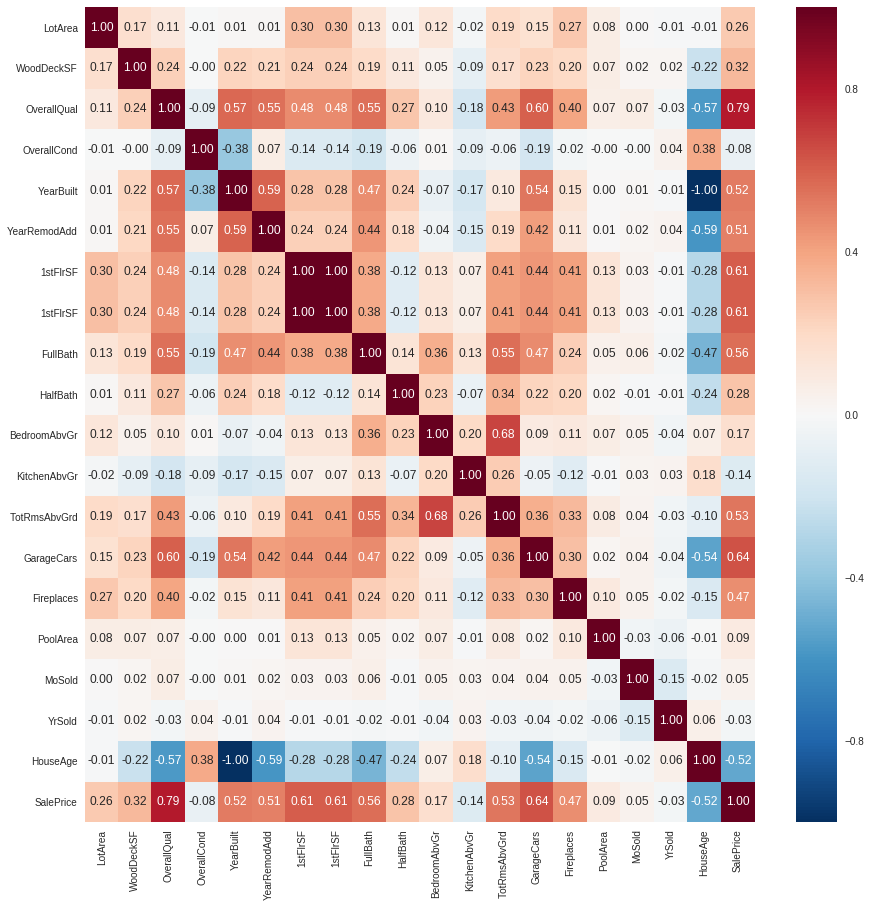

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(data_modell.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

#Maskinlærings modeller

Til maskinlæringsmodellene vil vi benytte datasettet fra løsningsforslaget i første seksjon. Vi ønsker å predikere salgsprisen basert på informasjonen vi inkluderte i dette datasettet. Altså vil input til modellen være utvalgte features, og outputen vil være salgspris. Dette deler vi opp i to ulike objekter. Data kan aksesseres i pandas objekter ved å bruke index istedenfør kolonnenanv. Dermed kan vi hente ut alle features, X, bortsett fra den siste, det er salgsprisen, Y.

Dette gjøres med pandas funksjon:

<br> $data.iloc[rad, kolonne] $ <br>

I python betyr ":" alle, altså alle rader, og "0:-1" betyre fra og med 0 til (og ikke med) element (-1)

In [34]:
#Velg alle kolonner untatt den siste. Denne inneholder Salgsprisen som vi ønsker å predikere
input_data = data_modell.iloc[:,0:-1]

#Velg kun siste kolonne. Dette er salgsprisen
output_data = data_modell['SalePrice']

print('Datastørrelse på features: {}, datastørrelse på priser: {}'.format(input_data.shape,output_data.shape))

Datastørrelse på features: (1460, 22), datastørrelse på priser: (1460,)


In [35]:
data_modell.head(5)

,LotArea,Neighborhood,WoodDeckSF,Condition1,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,Fireplaces,PoolArea,MoSold,YrSold,HouseAge,SalePrice
0,8450,CollgCr,0,Norm,2Story,7,5,2003,2003,856,856,2,1,3,1,8,2,0,0,2,2008,5,208500
1,9600,Veenker,298,Feedr,1Story,6,8,1976,1976,1262,1262,2,0,3,1,6,2,1,0,5,2007,31,181500
2,11250,CollgCr,0,Norm,2Story,7,5,2001,2002,920,920,2,1,3,1,6,2,1,0,9,2008,7,223500
3,9550,Crawfor,0,Norm,2Story,7,5,1915,1970,961,961,1,0,3,1,7,3,1,0,2,2006,91,140000
4,14260,NoRidge,192,Norm,2Story,8,5,2000,2000,1145,1145,2,1,4,1,9,3,1,0,12,2008,8,250000


Maskinlæringsmodellene ser kun tallverdier, det er derfor ikke mulig å servere den kategoriske verdier som "Neighborhood". Vi må derfor konvertere all kategorisk input til tallverdier. Et enkelt eksempel er å se på "Street" featuren, som kun har to kategorier.

In [36]:
data["Street"].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

Disse kategoriene kan oversettes til [0 , 1] istedenfor ['Pvae' , 'Grvl'] slik at de blir lesbare for modellene våre. Dette må gjøres med alle kategoriske verdier i datasettet vi skal bruke. Scikit-learn har funksjoner som gjør dette enkelt.

se mer: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [37]:
from sklearn import preprocessing

## Oppretter encodere for de ulike kategoriene vi ønsker å transformere fra tekst til tall.
Neighborhood = preprocessing.LabelEncoder()
Condition1 = preprocessing.LabelEncoder()
HouseStyle = preprocessing.LabelEncoder()

## Konverterer kolonnene som inneholder tekstverdier til tallverdier
input_data['Neighborhood'] = Neighborhood.fit_transform(input_data['Neighborhood'])
input_data['Condition1'] = Condition1.fit_transform(input_data['Condition1'])
input_data['HouseStyle'] = HouseStyle.fit_transform(input_data['HouseStyle'])

## Sjekker at kolonnene med kategoriske features har fått tallverdier
input_data.head(5)

,LotArea,Neighborhood,WoodDeckSF,Condition1,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,1stFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,Fireplaces,PoolArea,MoSold,YrSold,HouseAge
0,8450,5,0,2,5,7,5,2003,2003,856,856,2,1,3,1,8,2,0,0,2,2008,5
1,9600,24,298,1,2,6,8,1976,1976,1262,1262,2,0,3,1,6,2,1,0,5,2007,31
2,11250,5,0,2,5,7,5,2001,2002,920,920,2,1,3,1,6,2,1,0,9,2008,7
3,9550,6,0,2,5,7,5,1915,1970,961,961,1,0,3,1,7,3,1,0,2,2006,91
4,14260,15,192,2,5,8,5,2000,2000,1145,1145,2,1,4,1,9,3,1,0,12,2008,8


Som nevnt i presentasjonen, må vi fordele dataen inn i trenings, validerings og testsett. Nå tar vi ut et test sett, og gjemmer det til slutten for å gjennomføre en endelig test av de ferdige modellene. Vi benytter funksjonen

<br> $ train_test_split(X, Y, test_sett_andel) $ <br>

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [38]:
#Dataen deles opp i to sett: treningssett og testsett. Test_size bestemmer andelen av dataen som blir brukt til testing av modellen
from sklearn.model_selection import train_test_split

input_treningsdata, input_testdata, output_treningsdata, output_testdata = train_test_split(input_data, output_data, test_size=0.2, random_state=1)

print('Input_treningsdata: {}, input_testdata: {}, output_treningsdata: {} og output_testdata: {}'.format(input_treningsdata.shape, input_testdata.shape, output_treningsdata.shape, output_testdata.shape))


Input_treningsdata: (1168, 22), input_testdata: (292, 22), output_treningsdata: (1168,) og output_testdata: (292,)


In [43]:
input_treningsdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 921 to 1061
Data columns (total 22 columns):
LotArea         1168 non-null int64
Neighborhood    1168 non-null int64
WoodDeckSF      1168 non-null int64
Condition1      1168 non-null int64
HouseStyle      1168 non-null int64
OverallQual     1168 non-null int64
OverallCond     1168 non-null int64
YearBuilt       1168 non-null int64
YearRemodAdd    1168 non-null int64
1stFlrSF        1168 non-null int64
1stFlrSF        1168 non-null int64
FullBath        1168 non-null int64
HalfBath        1168 non-null int64
BedroomAbvGr    1168 non-null int64
KitchenAbvGr    1168 non-null int64
TotRmsAbvGrd    1168 non-null int64
GarageCars      1168 non-null int64
Fireplaces      1168 non-null int64
PoolArea        1168 non-null int64
MoSold          1168 non-null int64
YrSold          1168 non-null int64
HouseAge        1168 non-null int64
dtypes: int64(22)
memory usage: 209.9 KB


In [39]:
input_testdata.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 258 to 409
Data columns (total 22 columns):
LotArea         292 non-null int64
Neighborhood    292 non-null int64
WoodDeckSF      292 non-null int64
Condition1      292 non-null int64
HouseStyle      292 non-null int64
OverallQual     292 non-null int64
OverallCond     292 non-null int64
YearBuilt       292 non-null int64
YearRemodAdd    292 non-null int64
1stFlrSF        292 non-null int64
1stFlrSF        292 non-null int64
FullBath        292 non-null int64
HalfBath        292 non-null int64
BedroomAbvGr    292 non-null int64
KitchenAbvGr    292 non-null int64
TotRmsAbvGrd    292 non-null int64
GarageCars      292 non-null int64
Fireplaces      292 non-null int64
PoolArea        292 non-null int64
MoSold          292 non-null int64
YrSold          292 non-null int64
HouseAge        292 non-null int64
dtypes: int64(22)
memory usage: 52.5 KB


##Lineær regresjon

Linær regresjon er modell der man forsøker å tilpasse en rett linje til data. Målet er å minimere den totale avstanden fra datapunktene til linjen. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/438px-Linear_regression.svg.png">

Les mer om <a href="https://en.wikipedia.org/wiki/Linear_regression">Linear regression</a><br>
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" >Scikit-learn dokumentasjon</a>

<p>
  ###  Trene lineær modell
  For å trene en modell basert på lineær regresjon må man importere riktig modell fra Scikit-learn. Deretter må man lage et objekt som representerer modellen. Dette kan gjøres ved å skrive: <br>
 $modell\_lineær = LinearRegression()$ <br>
  Når modell-objektet er opprettet må man kalle objektets metode $fit()$. Denne metoden tar to parametere; features og tilhørende output, eller X og y. I vårt tilfelle er features alle kolonner som beskriver huset, mens output er salgsprisen. For å trene modellen til dette datasette skriver man derfor: <br>
  $modell\_lineær.fit(input\_treningsdata, output\_treningsdata)$ <br>
  Den lærte sammenhengen mellom husets egenskaper og salgspris er nå lagret i modellen. 
  
<p/>

In [41]:
#Treningsfase
from sklearn.linear_model import LinearRegression

#Regressjons-objekt fra scikit-learn
modell_lineær = LinearRegression()

#Tilpass regressjonskoeffesienter med treningsdata
modell_lineær.fit(input_treningsdata, output_treningsdata)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

###Predikere salgspris med lineær modell <br>
Den lærte modellen kan nå brukes til å predikere salgspriser på hus. Siden vi har spart endel data som modellen ikke har sett før, kan man måle hvor nøyaktig modellen er til å predikere salgspris.<br>
Dette kan gjøres ved å kalle $modell\_lineær.predict()$. <br>
Metoden $predict()$ tar ett parameter; $input\_testdata$. Dette er dataene som vi har reservert for testing av modellen.  Resultatet av prediksjonen lagrer vi i $pris\_prediksjoner\_lineær$<br>
<p>
Vi ønsker å måle feilprediksjonen kvantitativt, og trenger derfor en feilmåling. Gjennomsnittet av absolutt feil er en simpel og oversiktlig måte å beregne feilprediksjoner på. Heldigvis slipper vi å regne ut dette selv da scikit-learn har ferdigbygde metoder for dette. For å få til dette må vi  kalle $mean\_absolute\_error()$.  Metoden må gis to parametre; $pris\_prediksjoner\_lineær$ og $output\_testdata$. På den måten kan gjennomsnittelig absloutt feil regnes ut og lagres i $MAE\_lin$<p>


In [42]:
#Testfase

## Importerer metode for å måle gjennomsnittlig absolutt feil
from sklearn.metrics import mean_absolute_error

#Gjør pris-prediksjon på testdataen. 
pris_prediksjoner_lineær = modell_lineær.predict(input_testdata)

#Beregn feil
MAE_lin = mean_absolute_error(pris_prediksjoner_lineær, output_testdata)

#Feilen skrives ut
print("MAE: {}".format(MAE_lin))

MAE: 24401.997246509003


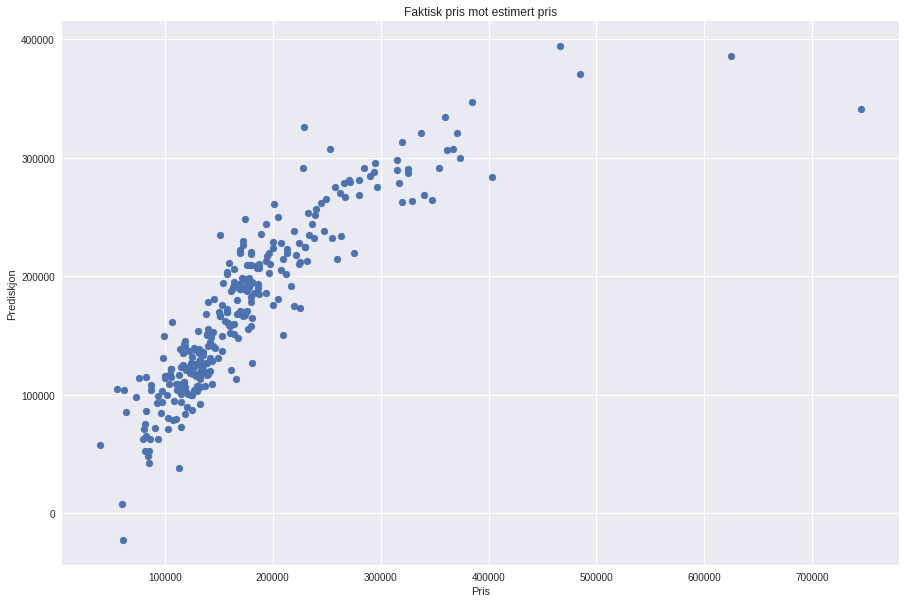

In [43]:
plt.figure(figsize=(15, 10))
plt.scatter(x=output_testdata, y=pris_prediksjoner_lineær)
plt.xlabel('Pris')
plt.ylabel('Prediskjon')
plt.title('Faktisk pris mot estimert pris')
plt.show()

## Decision tree regression

Decision trees baserer seg på å forsøke å dele datasettet i undergrupper. Ved å bevege seg gjennom treet kan et data klassifiseres. Decision trees kan også brukes til regresjon. 

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png">

Les mer om <a href="https://en.wikipedia.org/wiki/Decision_tree_learning">Decision tree</a><br>
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html">Scikit-learn dokumentasjon</a>

<p>
  ### Trene Decision tree 
 På samme måte som tidligere må man importere riktig modell fra Scikit-learn. Vi skal ha $DecisionTreeRegressor$. Deretter må modellen lages ved å skrive. <br>
 $model\_tre = DecisionTreeRegresseor()$ <br>
  
  Vi trener modellen på samme vis <br>
  $model\_tre.fit(input\_treningsdata, output\_treningsdata)$ <br>
Sammenhengen er nå lagret i modell-objektet. 
  
<p/>

In [50]:
## Importerer DecisionTreeRegressor fra sklearn
from sklearn.tree import DecisionTreeRegressor

## Oppretter modell
model_tre = DecisionTreeRegressor()

## Trener modell med features og labels. 
model_tre.fit(input_treningsdata, output_treningsdata)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [51]:

pris_prediksjon_tre = model_tre.predict(input_testdata)

MAE_tre = mean_absolute_error(pris_prediksjon_tre, output_testdata)

print("MAE: {}".format(MAE_tre))

MAE: 29231.29109589041


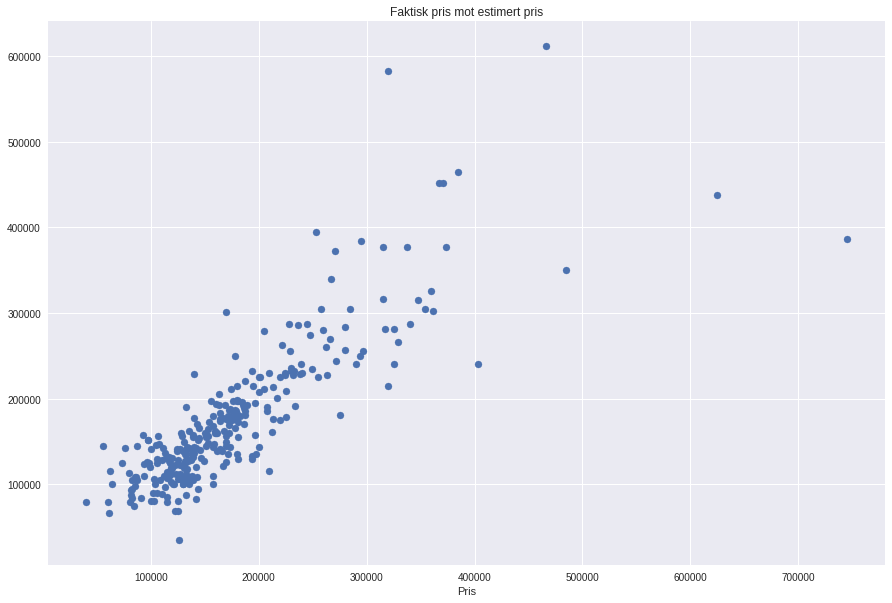

In [52]:
plt.figure(figsize=(15, 10))
plt.scatter(output_testdata, pris_prediksjon_tre)
plt.xlabel('Predkisjon')
plt.xlabel('Pris')
plt.title('Faktisk pris mot estimert pris')
plt.show()

##Skog regressjon
Skogmodeller tar utgangspunkt i Decision trees. I stedte for å generere ett tre, så kan skogmodeller generere mange trær. Trærne i skogen "stemmer over"/"enes om" riktig resultat.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png">

Les mer om <a href="https://en.wikipedia.org/wiki/Random_forest">Skogregresjon</a><br>
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html">Scikit-learn dokumentasjon</a>

In [47]:
#Forest regression

from sklearn.ensemble import RandomForestRegressor

modell_skog = RandomForestRegressor(random_state=1)

modell_skog.fit(input_treningsdata, output_treningsdata)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [48]:
pris_prediksjon_skog = modell_skog.predict(input_testdata)

MAE_skog = mean_absolute_error(pris_prediksjon_skog, output_testdata)

print("MAE: {}".format(MAE_skog))

MAE: 20814.742465753425


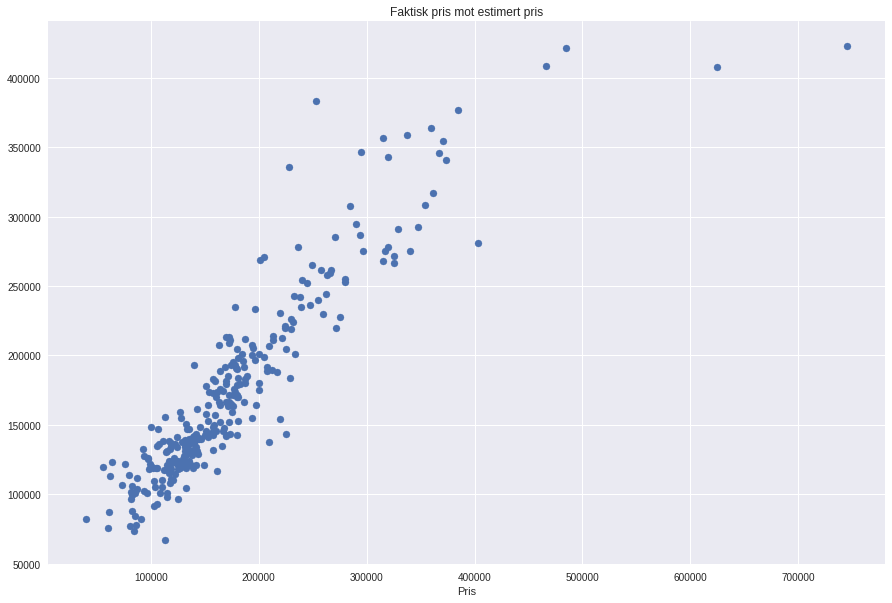

In [49]:
plt.figure(figsize=(15, 10))
plt.scatter(output_testdata, pris_prediksjon_skog)
plt.xlabel('Predkisjon')
plt.xlabel('Pris')
plt.title('Faktisk pris mot estimert pris')
plt.show()

##Nevralt nettverk regressjon

Nevrale nettverk henter inspirasjon fra biologien. I nevrale nettverk endres vekter mellom "celler" i nettverket for å estimere korrekte verdier eller klasser. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/296px-Colored_neural_network.svg.png">

Les mer om <a href="https://en.wikipedia.org/wiki/Artificial_neural_network">nevrale nettverk</a><br>
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html">Scikit-learn dokumentasjon</a>

In [50]:
from sklearn.neural_network import MLPRegressor

modell_MLPR = MLPRegressor(hidden_layer_sizes=(200,), activation='relu',solver='adam', learning_rate_init=0.001, momentum = 0.9, validation_fraction = 0.1)

modell_MLPR.fit(input_treningsdata, output_treningsdata)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [51]:
pris_prediksjon_MLPR = modell_MLPR.predict(input_testdata)

MAE_MLPR = mean_absolute_error(pris_prediksjon_MLPR, output_testdata)

print("MAE: {}".format(MAE_MLPR))

MAE: 48828.693588795264


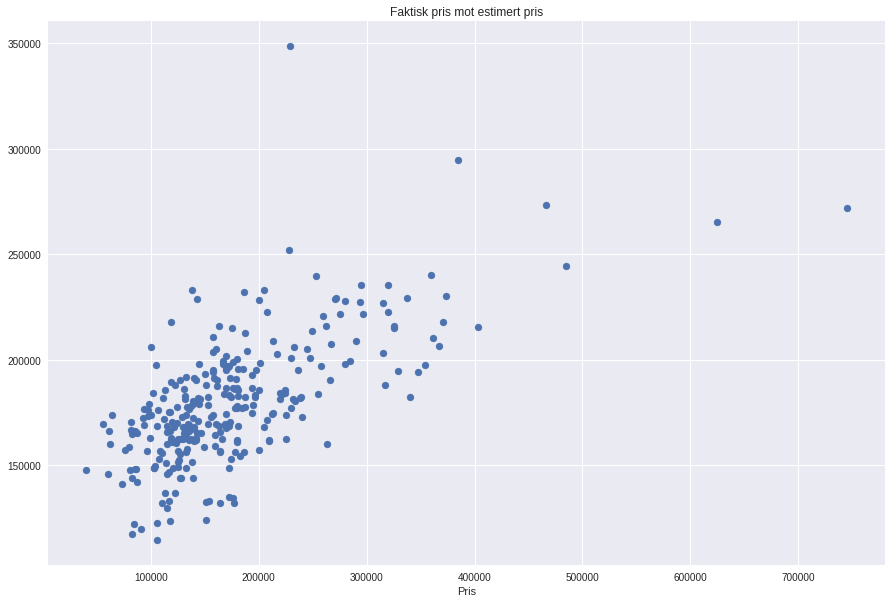

In [52]:
plt.figure(figsize=(15, 10))
plt.scatter(output_testdata, pris_prediksjon_MLPR)
plt.xlabel('Predkisjon')
plt.xlabel('Pris')
plt.title('Faktisk pris mot estimert pris')
plt.show()

# Analyse av resultater

La oss se nærmere på 10 eksempler i datasettet

##Sammenlikning av modeller

Vi kan slå sammen prediksjonene til alle modellene i en dataframe for å lettere sammenlikne outputen

In [53]:
kolonner_resultat = ['output_testdata', 'pris_prediksjoner_lineær', 'pris_prediksjon_tre','pris_prediksjon_skog', 'pris_prediksjon_MLPR']
resultat_data = {'output_testdata':output_testdata, 'pris_prediksjoner_lineær':pris_prediksjoner_lineær, 'pris_prediksjon_tre':pris_prediksjon_tre, 'pris_prediksjon_skog':pris_prediksjon_skog, 'pris_prediksjon_MLPR':pris_prediksjon_MLPR}

resultat = pd.DataFrame(data=resultat_data, columns = kolonner_resultat)
resultat.head(5)

,output_testdata,pris_prediksjoner_lineær,pris_prediksjon_tre,pris_prediksjon_skog,pris_prediksjon_MLPR
258,231500,212757.203523,230000,223790.0,181157.247047
267,179500,178666.508470,140000,142650.0,177983.185293
288,122000,100919.514698,93000,126225.0,167913.291660
649,84500,48506.688153,75500,73450.0,122115.456365
1233,142000,131394.468845,174900,143690.0,190445.752835


In [54]:
MAE_kolonner = ['MAE_lin','MAE_tre','MAE_skog','MAE_MLPR']
MAE_alle = pd.DataFrame(data={'MAE_lin':[MAE_lin], 'MAE_tre':[MAE_tre], 'MAE_skog':[MAE_skog],'MAE_MLPR':[MAE_MLPR]},columns=MAE_kolonner)
MAE_alle.head()

,MAE_lin,MAE_tre,MAE_skog,MAE_MLPR
0,24401.997247,30875.445205,20814.742466,48828.693589


Vi kan også plott alle prediksjonspunktene til hver modell mot hverandre for å visualisere hvordan prediksjons-distribusjonen ser ut

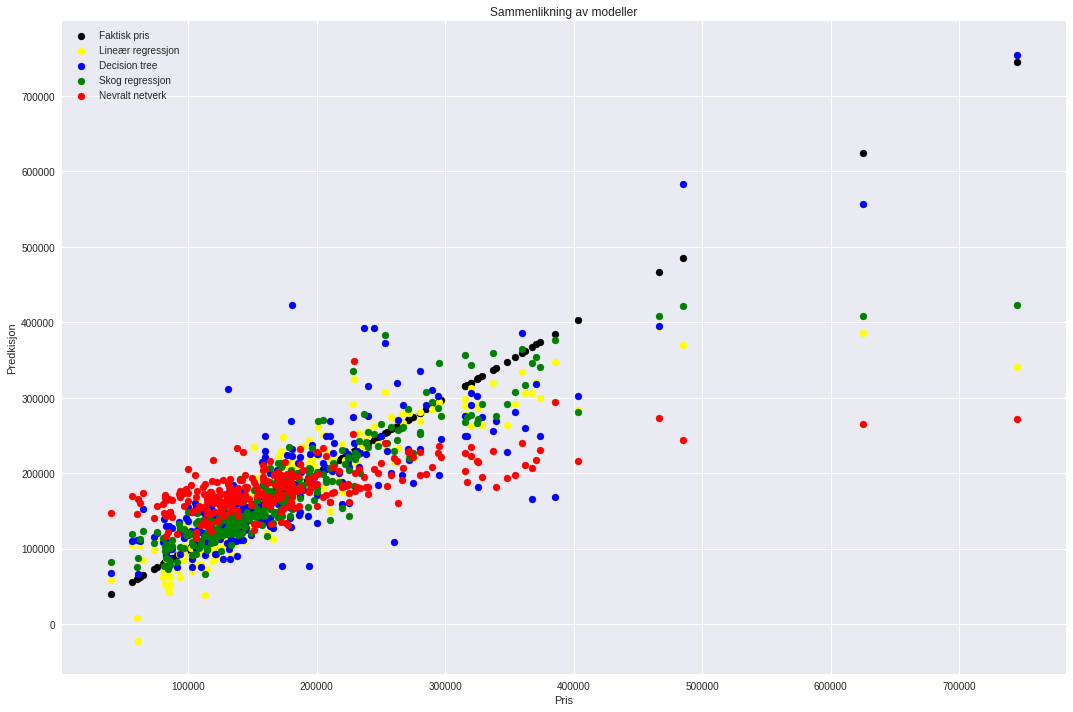

In [57]:
plt.figure(figsize=(18, 12))
plt.scatter(output_testdata, output_testdata, color='black', label='Faktisk pris')
plt.scatter(output_testdata, pris_prediksjoner_lineær, color='yellow', label='Lineær regressjon')
plt.scatter(output_testdata, pris_prediksjon_tre, color='blue', label='Decision tree')
plt.scatter(output_testdata, pris_prediksjon_skog, color='green', label='Skog regressjon')
plt.scatter(output_testdata, pris_prediksjon_MLPR, color='red', label='Nevralt netverk')
plt.ylabel('Predkisjon')
plt.xlabel('Pris')
plt.title('Sammenlikning av modeller')
plt.legend(loc='upper left')
plt.show()

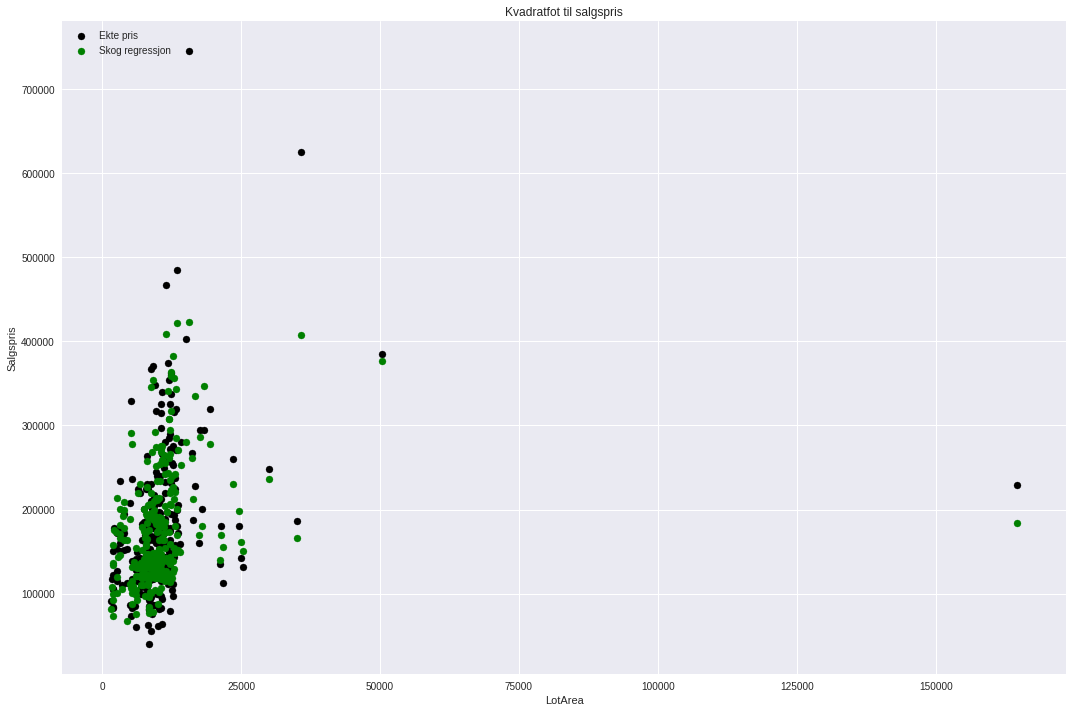

In [58]:
plt.figure(figsize=(18, 12))
plt.scatter(input_testdata['LotArea'], output_testdata, color='black', label='Ekte pris')
plt.scatter(input_testdata['LotArea'], pris_prediksjon_skog, color='green', label='Skog regressjon')
plt.ylabel('Salgspris')
plt.xlabel('LotArea')
plt.title('Kvadratfot til salgspris')
plt.legend(loc='upper left')
plt.show()

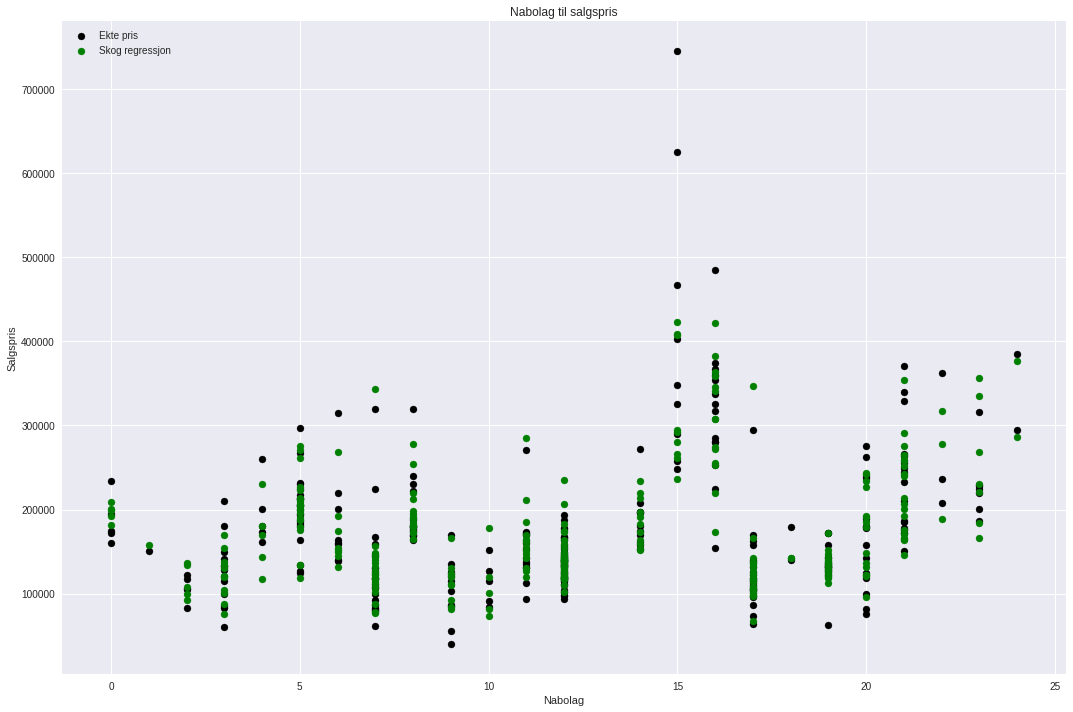

In [64]:
plt.figure(figsize=(18, 12))
plt.scatter(input_testdata['Neighborhood'], output_testdata, color='black', label='Ekte pris')
plt.scatter(input_testdata['Neighborhood'], pris_prediksjon_skog, color='green', label='Skog regressjon')
plt.ylabel('Salgspris')
plt.xlabel('Nabolag')
plt.title('Nabolag til salgspris')
plt.legend(loc='upper left')
plt.show()

##Oppgave: Bygg model

Bygg din egen modell på datasettet du lagde i tidligere seksjon. Juster parametrene til modellen og forsøk å få så lav MAE som mulig. Bruk gjerne andre regressjonsmetoder i scikit-learn biblioteket:

http://scikit-learn.org/stable/supervised_learning.html

Bruk gjerne modellene som allerede er satt opp og juster parameterene for å forbedre modellen. Se hvor lav MAE du kan få.